# IPL 2023 AUCTION ANALYSIS


In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

In [2]:
#TO IMPORT THE FILE

In [3]:
ipl_df=pd.read_csv('iplauction2023.csv')

In [4]:
ipl_df.head(10)

,name,player style,nationality,base price (in lacs),final price (in lacs),franchise,status
0,Harshit Rana,Bowler,India,NaN,20.0,KKR,RETAINED
1,Ekant Sen,Batter,India,20.0,NaN,NaN,UNSOLD
2,Wayne Parnell,Allrounder,South Africa,75.0,NaN,NaN,UNSOLD
3,Shakib Al Hasan,Allrounder,Bangladesh,150.0,150.0,KKR,SOLD
4,Joe Root,Batter,England,100.0,100.0,RR,SOLD
5,Abdul Basith,Allrounder,India,20.0,20.0,RR,SOLD
6,Prashant Chopra,Allrounder,India,20.0,NaN,NaN,UNSOLD
7,Akeal Hosein,Bowler,West Indies,100.0,100.0,SRH,SOLD
8,Raghav Goyal,Bowler,India,20.0,20.0,MI,SOLD
9,Yudhvir Singh Charak,Allrounder,India,20.0,20.0,LSG,SOLD


In [5]:
ipl_df.describe()

,base price (in lacs),final price (in lacs)
count,151.000000,238.000000
mean,59.205298,368.067227
std,59.688337,449.070117
min,20.000000,20.000000
25%,20.000000,21.250000
50%,20.000000,150.000000
75%,75.000000,625.000000
max,200.000000,1850.000000


In [6]:
ipl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   name                   309 non-null    object 
 1   player style           309 non-null    object 
 2   nationality            309 non-null    object 
 3   base price (in lacs)   151 non-null    float64
 4   final price (in lacs)  238 non-null    float64
 5   franchise              238 non-null    object 
 6   status                 309 non-null    object 
dtypes: float64(2), object(5)
memory usage: 17.0+ KB


# IN MY POINT OF VIEW

BASE PRICE,FINAL PRICE,FRANCHISE ARE SOME NULL VALUES BECAUSE
      1.)  BASE_PRICE IS NULL DUE TO RETAINED PLAYERS BECAUSE RETAINED PLAYERS HAVE NO BASE PRICE
      2.)  FINALl_PRICE AND FRANCHISE IS NULL DUE TO SOME PLAYERS ARE UNSOLD
      THIS IS NOT A ONLY REASON. THESE ALSO A ONE OF THE REASONS

In [10]:
ipl_df.shape

(309, 7)

In [11]:
#Total 309 players  are participated in the IPL Auction

In [13]:
ipl_df.columns

Index(['name', 'player style', 'nationality', 'base price (in lacs)',
       'final price (in lacs)', 'franchise', 'status'],
      dtype='object')

In [18]:
ipl_players=ipl_df['name'].value_counts()
ipl_players

name
Harshit Rana         1
Bhanuka Rajapaksa    1
Simarjeet Singh      1
Mohsin Khan          1
Pradeep Sangwan      1
                    ..
Chintal Gandhi       1
Izharulhaq Naveed    1
Shreyas Gopal        1
Sudhesan Midhun      1
Axar Patel           1
Name: count, Length: 309, dtype: int64

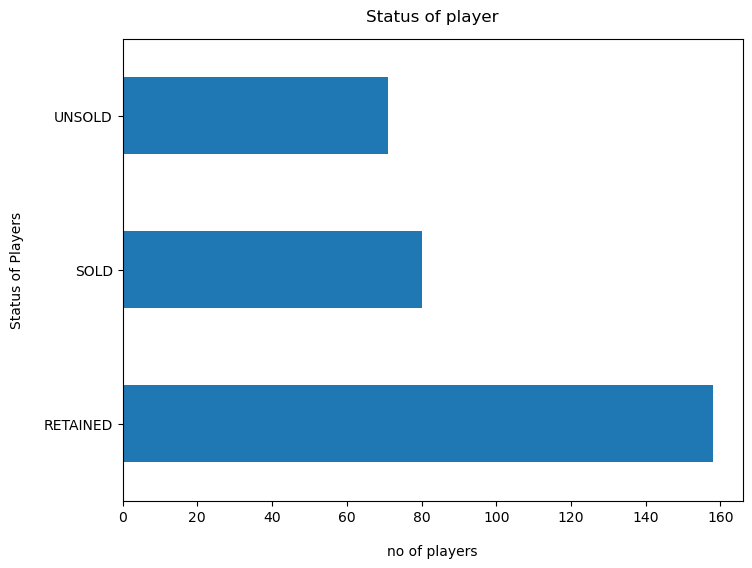

In [19]:
ipl_df['status'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("no of players", labelpad=14)
plt.ylabel("Status of Players", labelpad=14)
plt.title("Status of player", y=1.02);

In [20]:
# Retained player are high nearly 155 players
#Sold players are nearly 80 players 
#unsold players are nearly 74 players

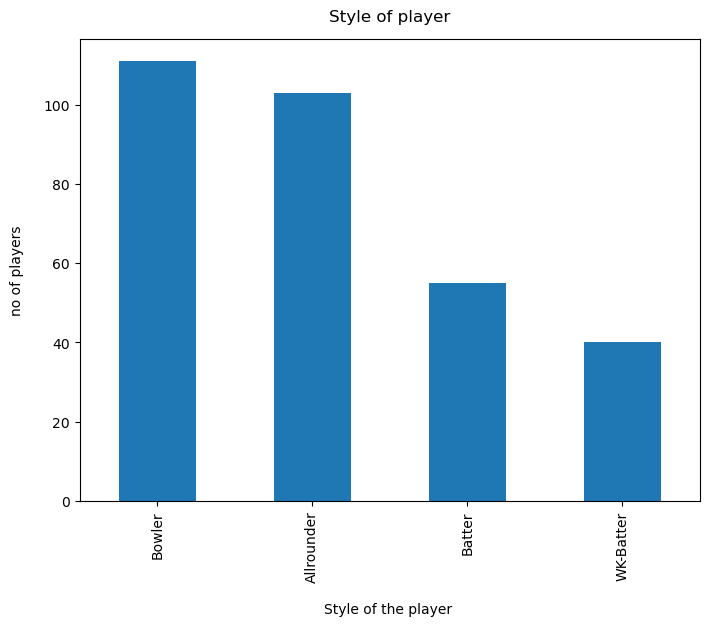

In [24]:
ipl_df['player style'].value_counts().plot(kind='bar', figsize=(8, 6))
plt.ylabel("no of players", labelpad=14)
plt.xlabel("Style of the player ", labelpad=14)
plt.title("Style of player", y=1.02);

In [25]:
#Bowlers are highly participated in the IPL 2023 AUCTION  are nearly 110 bowlers 
#All rounders are nearly 102 player
#Batters are nearly to the  57 player
#Wk Batters are nearly to 40 players 


<Axes: xlabel='franchise', ylabel='count'>

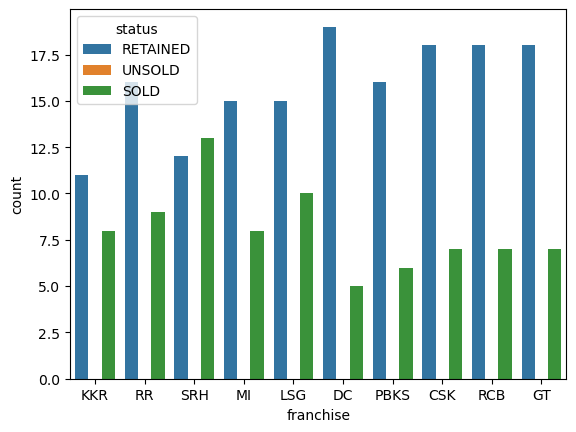

In [26]:
sns.countplot(data=ipl_df,x='franchise',hue='status')

In [27]:
#DC HAVE A  BEST RETAINED STARTEGY TO RETAINTHE PLAYERS
#SRH have a Auction stragegy.
#Csk,Rcb,Gt are following like similar startegy

Text(0.5, 1.0, 'Franchise Spending Patterns')

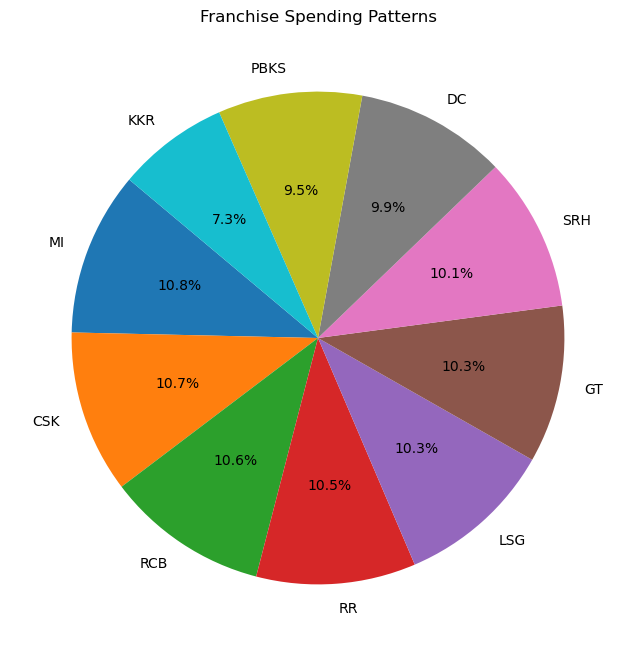

In [30]:
franchise_spending=ipl_df.groupby('franchise')['final price (in lacs)'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,8))
plt.pie(franchise_spending, labels=franchise_spending.index, autopct='%1.1f%%', startangle=140)
plt.title('Franchise Spending Patterns')


In [31]:
# MI is the most amount spend in the auction
#PBKS is the less amount spend in the auction

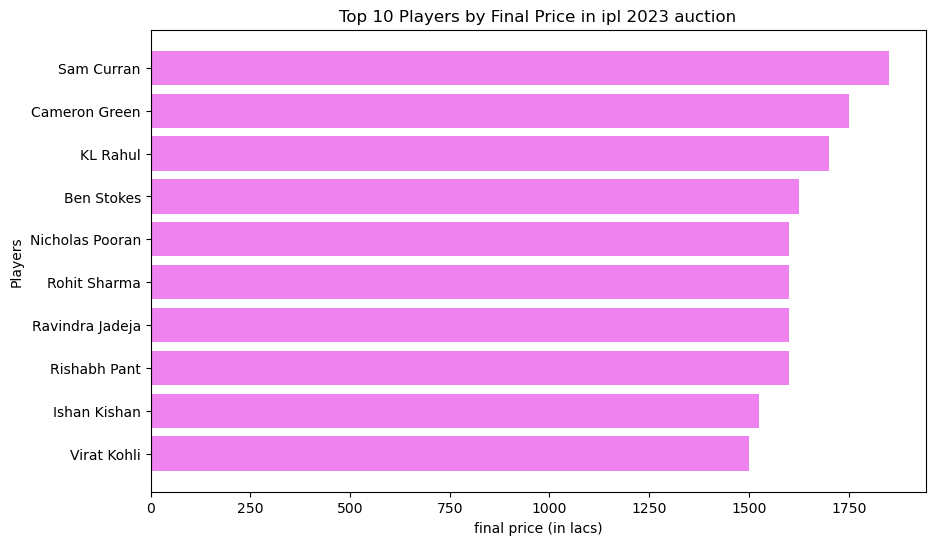

In [40]:
top_players=ipl_df.nlargest(10,'final price (in lacs)')

plt.figure(figsize=(10,6))
plt.barh(top_players['name'],top_players['final price (in lacs)'],color='violet')
plt.xlabel('final price (in lacs)')
plt.ylabel('Players')
plt.title('Top 10 Players by Final Price in ipl 2023 auction')
plt.gca().invert_yaxis()


In [43]:
#SAMCURRAN is the most valuable player in the auction
#Camero green is the second valuable player in the auction

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Bowler'),
  Text(1, 0, 'Batter'),
  Text(2, 0, 'Allrounder'),
  Text(3, 0, 'WK-Batter')])

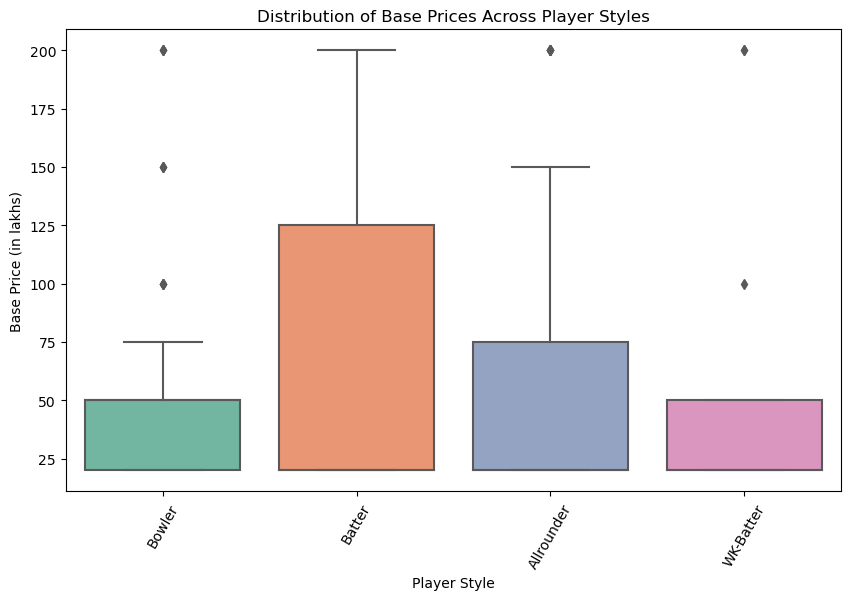

In [47]:
import matplotlib.ticker as pticker
plt.figure(figsize=(10,6))
sns.boxplot(data=ipl_df, x='player style',y='base price (in lacs)',palette='Set2')
plt.title('Distribution of Base Prices Across Player Styles')
plt.xlabel('Player Style')
plt.ylabel('Base Price (in lakhs)')
plt.xticks(rotation=60)

In [48]:
#More outliers are present in the bowler
#Are 25% batters  are above 125lakhs  in base price

ModuleNotFoundError: No module named 'geopandas'

# CONCLUSION OF MY OPNION AND INSIGHTS